## Spring 2022 CS 4641\7641 A: Machine Learning Homework 4

## Instructor: Dr. Mahdi Roozbahani

## Deadline: Thursday, April 21, 2022 11:59 pm AOE

<!-- No changes needed on the below section -->
* No unapproved extension of the deadline is allowed. Late submission will lead to 0 credit. 

* Discussion is encouraged on Ed as part of the Q/A. However, all assignments should be done individually.
<font color='darkred'>
* Plagiarism is a **serious offense**. You are responsible for completing your own work. You are not allowed to copy and paste, or paraphrase, or submit materials created or published by others, as if you created the materials. All materials submitted must be your own.</font>
<font color='darkred'>
* All incidents of suspected dishonesty, plagiarism, or violations of the Georgia Tech Honor Code will be subject to the institute’s Academic Integrity procedures. If we observe any (even small) similarities/plagiarisms detected by Gradescope or our TAs, **WE WILL DIRECTLY REPORT ALL CASES TO OSI**, which may, unfortunately, lead to a very harsh outcome. Consequences can be severe, e.g., academic probation or dismissal, grade penalties, a 0 grade for assignments concerned, and prohibition from withdrawing from the class.
</font>

## Instructions for the assignment 

<!-- No changes needed on the below section -->
- This assignment consists of both programming and theory questions.

- Unless a theory question explicitly states that no work is required to be shown,  you must provide an explanation, justification, or calculation for your answer.

- To switch between cell for code and for markdown, see the menu -> Cell -> Cell Type
    
- You can directly type Latex equations into markdown cells.
    
- If a question requires a picture, you could use this syntax `<img src="" style="width: 300px;"/>` to include them within your ipython notebook.

- Your write up must be submitted in PDF form. You may use either Latex,  markdown, or any word processing software. <font color = 'darkred'>We will **NOT** accept handwritten work. </font> Make sure that your work is formatted correctly, for example submit $\sum_{i=0} x_i$ instead of \text{sum\_\{i=0\} x\_i}
- When submitting the non-programming part of your assignment, you must correctly map pages of your PDF to each question/subquestion to reflect where they appear. <font color='darkred'>**Improperly mapped questions may not be graded correctly and/or will result in point deductions for the error.**</font>
- All assignments should be done individually, and each student must write up and submit their own answers.
- **Graduate Students**: You are required to complete any sections marked as Bonus for Undergrads  
 
    

## Using the autograder


* You will find three assignments (for grads) on Gradescope that correspond to HW4: "Assignment 4 Programming", "Assignment 4 - Non-programming" and "Assignment 4 Programming - Bonus for all". Undergrads will have an additional assignment called "Assignment 4 Programming - Bonus for Undergrads". 
* You will submit your code for the autograder in the Assignment 4 Programming sections. Please refer to the Deliverables and Point Distribution section for what parts are considered required, bonus for undergrads, and bonus for all".
* We provided you different .py files and we added libraries in those files please DO NOT remove those lines and add your code after those lines. Note that these are the only allowed libraries that you can use for the homework 
* You are allowed to make as many submissions until the deadline as you like. Additionally, note that the autograder tests each function separately, therefore it can serve as a useful tool to help you debug your code if you are not sure of what part of your implementation might have an issue 
* For the "Assignment 4 - Non-programming" part, you will download your Jupyter Notebook as html and submit it as a PDF on Gradescope. To download the notebook as html, click on "File" on the top left corner of this page and select "Download as > html". Then, open the html file and print to PDF. Please refer to the Deliverables and Point Distribution section for an outline of the non-programming questions. 
* **When submitting to Gradescope, please make sure to mark the page(s) corresponding to each problem/sub-problem. The pages in the PDF should be of size 8.5" x 11", otherwise there may be a deduction in points for extra long sheets.**

## Deliverables and Points Distribution 

### Q1: Two Layer NN [65 pts; 50pts + 15pts Undergrad Bonus] 
#### Deliverables: <font color = 'green'>NN.py and Notebook Graphs</font>


- **Implementation** [55pts; 45pts + 10pts Bonus for CS 4641] - _programming_

    - relu [5pts]

    - tanh [5pts]

    - loss [5pts]

    - forward [10pts]
    
    - backward [10pts]
    
    - Gradient Descent [10pts]
    
    - Batch Gradient Descent [10pts Bonus for CS 4641]

- **Questions** [10pts: 5pts + 5pts Bonus for CS 4641] - _non-programming_

    - Loss plot and MSE for Gradient Descent [5pts]

    - Loss plot and MSE for Stochastic Gradient Descent [5pts Bonus for CS 4641]

### Q2: CNN [15pts; 12pts Undergrad Bonus + 3pts Bonus for All]
#### Deliverables: <font color = 'green'>cnn.py and Written Report</font>

- 2.1.3 [2pts Bonus for CS 4641] - *programming*

- 2.1.4 [8pts Bonus for CS 4641] - *non-programming*

- 2.1.5 [2pts Bonus for CS 4641] - *non-programming*

- 2.2   [3pts Bonus for All] - *non-programming*

### Q3: Random Forest [50pts]
#### Deliverables: <font color = 'green'>random_forest.py and Written Report</font>

- 3.1 Random Forest Implementation [35pts] - *programming*

- 3.2 Hyperparameter Tuning with a Random Forest [5pts] - *programming*

- 3.3 Plotting Feature Importance [5pts] - *non-programming*

- 3.4 Improvement [5pts] - *non-programming*

### Q4: SVM [30pts Bonus for all]
#### Deliverables: <font color = 'green'>feature.py and Written Report</font>

- 4.1: Fitting an SVM Classifier by hand [20pts] - * non programming*

- 4.2: Feature Mapping [10pts] - *programming*


## Environment Setup

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from collections import Counter
from scipy import stats
from math import log2, sqrt
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn import svm
%load_ext autoreload

%autoreload 2

%reload_ext autoreload

## 1: Two Layer Neural Network [70 pts; 55pts + 15pts Undergrad Bonus]  <span style="color:blue">**[P]**</span><span style="color:blue">**[W]**</span>

### Perceptron

<img src="./images/NN_image.png">

<br><br>

A single layer perceptron can be thought of as a linear hyperplane as in logistic regression followed by a non-linear activation function. $$u_{i} = \sum \limits_{j=1}^{d} \theta_{ij}x_{j}+b_{i}$$  $$o_{i} = \phi \left( \sum \limits_{j=1}^{d} \theta_{ij}x_{j}+b_{i} \right) = \phi(\theta_{i}^{T}x+b_{i})$$ where $x$ is a d-dimensional vector i.e. $x \in R^{d}$. It is one datapoint with $d$ features. $\theta_{i} \in R^{d}$ is the weight vector for the $i^{th}$ hidden unit, $b_{i} \in R$ is the bias element for the $i^{th}$ hidden unit and $\phi(.)$ is a non-linear activation function that has been described below. $u_{i}$ is a linear combination of the features in $x_j$ weighted by $\theta_{i}$ whereas $o_{i}$ is the $i^{th}$ output unit from the activation layer. 


## Fully connected Layer
Typically, a modern neural network contains millions of perceptrons as the one shown in the previous image. Perceptrons interact in different configurations such as cascaded or parallel. In this part, we describe a fully connected layer configuration in a neural network which comprises multiple parallel perceptrons forming one layer. 

We extend the previous notation to describe a fully connected layer. Each layer in a fully connected network has a number of input/hidden/output units cascaded in parallel. Let us a define a single layer of the neural net as follows: <br>
$m$ demotes the number of hidden units in a single layer $l$ whereas $n$ denotes the number of units in the previous layer $l-1$.
$$u^{[l]}=\theta^{[l]}o^{[l-1]}+b^{[l]}$$ where $u^{[l]} \in R^{m}$ is a m-dimensional vector pertaining to the hidden units of the $l^{th}$ layer of the neural network after applying linear operations. Similarly, $o^{[l-1]}$ is the n-dimensional output vector corresponding to the hidden units of the $(l-1)^{th}$ activation layer. $\theta^{[l]} \in R^{m \times n}$ is the weight matrix of the $l^{th}$ layer where each row of $\theta^{[l]}$ is analogous to $\theta_{i}$ described in the previous section i.e. each row corresponds to one hidden unit of the $l^{th}$ layer. $b^{[l]} \in R^{m}$ is the bias vector of the layer where each element of b pertains to one hidden unit of the $l^{th}$ layer. This is followed by element wise non-linear activation function $o^{[l]} = \phi(u^{[l]})$.
The whole operation can be summarized as,
$$o^{[l]} = \phi(\theta^{[l]}o^{[l-1]}+b^{[l]}) $$
where $o^{[l-1]}$ is the output of the previous layer. 





## Activation Function 
There are many activation functions in the literature but for this question we are going to use Relu and Tanh only. 

<span>**HINT 1: When calculating the tanh and relu function, make sure you are not modifying the values in the original passed in matrix. You may find np.copy() helpful (`u` should not be modified in the method.)**</span>
.
### Relu
The rectified linear unit (Relu) is one of the most commonly used activation functions in deep learning models. The mathematical form is $$o = \phi(u) = max(0,u)$$One of the advantages of Relu is that it is a fast nonlinearity. <br> The derivative of relu function is given as $o' = \phi'(u) = \begin{cases}
&0& u \leq 0 \\
&1& u > 0
\end{cases} $  


![Relu](https://drive.google.com/uc?id=1qFNOnhB3B0wgt56bMsc-WI6cX0UWJAQX)



### Tanh
Tanh also known as hyperbolic tangent is like a shifted version of sigmoid activation function with its range going from -1 to 1. Tanh almost always proves to be better than the sigmoid function since the mean of the activations are closer to zero. Tanh has an effect of centering data that makes learning for the next layer a bit easier. The mathematical form of tanh is given as $$o = \phi(u) = tanh(u) = \frac{e^{u} - e^{-u}}{e^{u} + e^{-u}}$$ The derivative of tanh is given as $$o' = \phi'(u) = 1 - {\left(\frac{e^{u} - e^{-u}}{e^{u} + e^{-u}}\right)}^{2} = 1 - o^{2}$$


![Tanh](https://drive.google.com/uc?id=1FD83cZIsI1gY6g0dDKyaaHFrCnThl9za)


### Sigmoid
The sigmoid function is another non-linear function with S-shaped curve. This function is useful in the case of binary classification as its output is between 0 and 1. The mathematical form of the function is $$o = \phi(u)=\frac{1}{1+e^{-u}}$$<br> The derivation of the sigmoid function has a nice form and is given as $$o' = \phi'(u) = \frac{1}{1+e^{-u}} \left(1-\frac{1}{1+e^{-u}}\right) = \phi(u)(1-\phi(u))$$
<br><br>

<b>Note:</b> We will not be using sigmoid activation function for this assignment. This is included only for the sake of completeness. 



![Sigmoid](https://drive.google.com/uc?id=19UPS1IfcVNqH_PMAPg6ymAAVqGo9zHle)




## Mean Squared Error 

It is an estimator that measures the average of the squares of the errors i.e. the average squared difference between the actual and the estimated values. It estimates the quality of the learnt hypothesis between the actual and the predicted values. It's non-negative and closer to zero, the better the learnt function is.

### Implementation details
For regression problems as in this exercise, we compute the loss as follows:

$$MSE = \frac{1}{2N}\sum\limits_{i=1}^{N}\left(y_{i} -  \hat{y_{i}}\right)^{2}$$
where $y_{i}$ is the true label and $\hat{y_{i}}$ is the estimated label. We use a factor of $\frac{1}{2N}$ instead of $\frac{1}{N}$ to simply the derivative of loss function. 


## Forward Propagation
We start by initializing the weights of the fully connected layer using Xavier initialization [Xavier initialization](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf) (At a high level, we are using a uniform distribution for weight initialization). During training, we pass all the data points through the network layer by layer using forward propagation. The main equations for forward prop have been described below. 
\begin{eqnarray}
u^{[0]} &=& x\\
u^{[1]}&=& \theta^{[1]}u^{[0]}+b^{[1]} \\
o^{[1]}&=& Relu(u^{[1]}) \\
u^{[2]}&=& \theta^{[2]}o^{[1]}+b^{[2]} \\
\hat{y}=o^{[2]}&=& Tanh(u^{[2]}) \\
\end{eqnarray}


Then we get the output and compute the loss 
$$l = \frac{1}{2N}\sum\limits_{i=1}^{N}\left(y_{i} -  \hat{y_{i}}\right)^{2}$$


## Backward propagation
After the forward pass, we do back propagation to update the weights and biases in the direction of the negative gradient of the loss function. So, we update the weights and biases using the following formulas
\begin{equation}
\theta^{[2]} := \theta^{[2]} - lr \times \frac{\partial l}{\partial \theta^{[2]}} \\
b^{[2]} := b^{[2]} - lr \times \frac{\partial l}{\partial b^{[2]}} \\
\theta^{[1]} := \theta^{[1]} - lr \times \frac{\partial l}{\partial \theta^{[1]}} \\
b^{[1]} := b^{[1]} - lr \times \frac{\partial l}{\partial b^{[1]}}
\end{equation}
where $lr$ is the learning rate. It decides the step size we want to take in the direction of the negative gradient. 



To compute the terms $\frac{\partial l}{\partial \theta^{[i]}}$ and $ \frac{\partial l}{\partial b^{[i]}}$ we use chain rule for differentiation as follows:

\begin{eqnarray}
\frac{\partial l}{\partial \theta^{[2]}}&=&\frac{\partial l}{\partial o^{[2]}}\frac{\partial o^{[2]}}{\partial u^{[2]}}\frac{\partial u^{[2]}}{\partial \theta^{[2]}} \\
\frac{\partial l}{\partial b^{[2]}}&=&\frac{\partial l}{\partial o^{[2]}}\frac{\partial o^{[2]}}{\partial u^{[2]}}\frac{\partial u^{[2]}}{\partial b^{[2]}}
\end{eqnarray}

So, $\frac{\partial l}{\partial o^{[2]}}$ is the differentiation of the loss function at point $o^{[2]}$ <br><br> $\frac{\partial o^{[2]}}{\partial u^{[2]}}$ is the differentiation of the Tanh function at point $u^{[2]}$ <br><br> $\frac{\partial u^{[2]}}{\partial \theta^{[2]}}$ is equal to $o^{[1]}$ <br><br> $\frac{\partial u^{[2]}}{\partial b^{[2]}}$ is equal to $1$. <br><br>

To compute $\frac{\partial l}{\partial \theta^{[2]}}$, we need $o^{[2]}, u^{[2]} \& o^{[1]}$ which are calculated during forward propagation. So we need to store these values in cache variables during forward propagation to be able to access them during backward propagation. Similarly for calculating other partial derivatives, we store the values we'll be needing for chain rule in cache. These values are obtained from the forward propagation and used in backward propagation. The cache is implemented as a dictionary here where the keys are the variable names and the values are the variables values.  <br><br>Also, the functional form of the MSE differentiation and Relu differentiation are given by <br><br>
\begin{eqnarray}
\frac{\partial l}{\partial o^{[2]}} &=& \left(o^{[2]} - y\right) \\
\frac{\partial l}{\partial u^{[2]}} &=&  \frac{\partial l}{\partial o^{[2]}} * (1 - (tanh(u^{[2]}))^2)\\
\frac{\partial u^{[2]}}{\partial \theta^{[2]}} &=& o^{[1]} \\
\frac{\partial u^{[2]}}{\partial b^{[2]}} &=& 1
\end{eqnarray}

On vectorization, the above equations become:
\begin{eqnarray}
\frac{\partial l}{\partial o^{[2]}} &=& \frac{1}{n}\left(o^{[2]} - y\right) \\
\frac{\partial l}{\partial \theta^{[2]}} &=&  \frac{1}{n}\frac{\partial l}{\partial u^{[2]}}o^{[1]} \\
\frac{\partial l}{\partial b^{[2]}} &=& \frac{1}{n}\sum\frac{\partial l}{\partial u^{[2]}}
\end{eqnarray}

<span>**HINT 2: Division by $N$ only needs to occur ONCE for any derivative that requires a division by $N$. Make sure you avoid cascading divisions by $N$ where you might accidentally divide your derivative by $N^2$ or greater.**</span>

This completes the differentiation of loss function w.r.t to parameters in the second layer. We now move on to the first layer, the equations for which are given as follows: <br><br> 
\begin{eqnarray}
\frac{\partial l}{\partial \theta^{[1]}}&=&\frac{\partial l}{\partial o^{[2]}}\frac{\partial o^{[2]}}{\partial u^{[2]}}\frac{\partial u^{[2]}}{\partial o^{[1]}} \frac{\partial o^{[1]}}{\partial u^{[1]}} \frac{\partial u^{[1]}}{\partial \theta^{[1]}}  \\
\frac{\partial l}{\partial b^{[1]}}&=&\frac{\partial l}{\partial o^{[2]}}\frac{\partial o^{[2]}}{\partial u^{[2]}}\frac{\partial u^{[2]}}{\partial o^{[1]}} \frac{\partial o^{[1]}}{\partial u^{[1]}} \frac{\partial u^{[1]}}{\partial b^{[1]}}
\end{eqnarray}

Where 
\begin{eqnarray}
\frac{\partial u^{[2]}}{\partial o^{[1]}} &=& \theta^{[2]} \\
\frac{\partial o^{[1]}}{\partial u^{[1]}} &=& 1(o^{[1]} > 0)\\
\frac{\partial u^{[1]}}{\partial \theta^{[1]}} &=& x\\
\frac{\partial u^{[1]}}{\partial b^{[1]}} &=& 1
\end{eqnarray}

Note that $\frac{\partial o^{[1]}}{\partial u^{[1]}}$ is the differentiation of the ReLU function at $u^{[1]}$.

The above equations outline the forward and backward propagation process for a 2-layer fully connected neural net with Relu as the first activation layer and Tanh has the second one. The same process can be extended to different neural networks with different activation layers. 



## Code Implementation: 

$$ \begin{eqnarray} dLoss\_o2 &=& \frac{\partial l}{\partial o^{[2]}} \implies dim=(1,375) \\ dLoss\_u2 &=& dLoss\_o2 \frac{\partial o^{[2]}}{\partial u^{[2]}} \implies dim=(1,375) \\ dLoss\_theta2 &=& dLoss\_u2 \frac{\partial u^{[2]}}{\partial \theta^{[2]}} \implies dim=(1,15) \\ dLoss\_b2 &=& dLoss\_u2 \frac{\partial u^{[2]}}{\partial b^{[2]}} \implies dim=(1,1) \\ dLoss\_o1 &=& dLoss\_u2 \frac{\partial u^{[2]}}{\partial o^{[1]}} \implies dim=(15,375) \\ dLoss\_u1 &=& dLoss\_o1 \frac{\partial o^{[1]}}{\partial u^{[1]}} \implies dim=(15,375) \\ dLoss\_theta1 &=& dLoss\_u1 \frac{\partial u^{[1]}}{\partial \theta^{[1]}} \implies dim=(15,8) \\ dLoss\_b1 &=& dLoss\_u1 \frac{\partial u^{[1]}}{\partial b^{[1]}} \implies dim=(15,1) \end{eqnarray} $$ 


<b>Note: </b>Training set has 375 examples.















### Question 

In this question, you will implement a two layer fully connected neural network. You will also experiment with different activation functions and optimization techniques. Functions with comments "TODO: implement this" are for you to implement. We provide two activation functions here - Relu and Tanh. You will implement a neural network that would have Relu activation followed by a Tanh layer. 

You'll also implement Gradient Descent (GD) and Batch Gradient Descent (BGD) algorithms for training these neural nets. **GD is mandatory for all. BGD is bonus for undergraduate students but mandatory for graduate students.** 

In the <strong>NN.py</strong> file, complete the following functions:
  * <strong>Relu</strong>: Recall Hint 1
  * <strong>Tanh</strong>: Recall Hint 1
  * <strong>nloss</strong>
  * <strong>forward</strong>
  * <strong>backward</strong>: Recall Hint 2
  * <strong>gradient_descent</strong>
  * <strong>batch_gradient_descent</strong>:<span style="color:darkred"> **Mandatory for graduate students, bonus for undergraduate students.**</span> Please batch your data in a wraparound manner. For example, given a dataset of 9 numbers, [1, 2, 3, 4, 5, 6, 7, 8, 9], and a batch size of 6, the first iteration batch will be [1, 2, 3, 4, 5, 6], the second iteration batch will be [7, 8, 9, 1, 2, 3], the third iteration batch will be [4, 5, 6, 7, 8, 9], etc... 

We'll train this neural net on sklearn's California housing dataset. Graduate students have to use both GD and BGD to optimize their neural net. Undergraduate students have to implement GD while BGD is bonus for them.  Note: it is possible you'll run into nan or negative values for loss. This happens because of some numerical stability issues that arise due to division by zero, natural log of zeros etc. You can experiment with the total number of iterations to mitigate this. 

You're free to tune hyperparameters like the batch size, number of hidden units in each layer etc. if that helps you in achieving the desired MSE values to pass the autograder tests. However, you're advised to try out the default values first. 


<b>Deliverables for this question: </b>
1. Loss plot and MSE value for neural net with gradient descent 
2. Loss plot and MSE value for neural net with batch gradient descent (mandatory for graduate students, bonus for undergraduate students)



Loss after iteration 0: 0.06580578498250138
Loss after iteration 1000: 0.02320561444627772
Loss after iteration 2000: 0.01861208160724238
Loss after iteration 3000: 0.016591511370856186
Loss after iteration 4000: 0.0158520728340582
Loss after iteration 5000: 0.015462203438163787
Loss after iteration 6000: 0.01519195285476188
Loss after iteration 7000: 0.014973320889456515
Loss after iteration 8000: 0.014783904241880506
Loss after iteration 9000: 0.014609356571820801
Loss after iteration 10000: 0.014441955428294231
Loss after iteration 11000: 0.01427951397183465
Loss after iteration 12000: 0.014119707751303473
Loss after iteration 13000: 0.013969949745068808
Loss after iteration 14000: 0.013818913820035101
Loss after iteration 15000: 0.01367756209103448
Loss after iteration 16000: 0.013541724061220051
Loss after iteration 17000: 0.013416187629710965
Loss after iteration 18000: 0.013286664004858742
Loss after iteration 19000: 0.013161035888453574
Loss after iteration 20000: 0.01303738105

Text(0, 0.5, 'Loss')

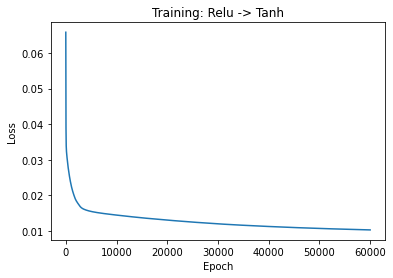

In [2]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from NN import dlnet

dataset = fetch_california_housing() # load the dataset
x, y = dataset.data, dataset.target
y = y.reshape(-1,1)
perm = np.random.RandomState(seed=3).permutation(x.shape[0])[:500]
x = x[perm]
y = y[perm]


x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1) #split data


x_scale = MinMaxScaler()
x_train = x_scale.fit_transform(x_train) #normalize data
x_test = x_scale.transform(x_test) 

y_scale = MinMaxScaler()
y_train = y_scale.fit_transform(y_train)
y_test = y_scale.transform(y_test)

x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.reshape(1,-1), y_test #condition data

nn = dlnet(x_train,y_train,lr=0.01) # initalize neural net class
nn.gradient_descent(x_train, y_train, iter = 60000) #train

# create figure
fig = plt.plot(np.array(nn.loss).squeeze())
plt.title(f'Training: {nn.neural_net_type}')
plt.xlabel("Epoch")
plt.ylabel("Loss")


In [3]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

y_predicted = nn.predict(x_test) # predict
y_test = y_test.reshape(1,-1)
print("Mean Squared Error (MSE)", (np.sum((y_predicted-y_test)**2)/y_test.shape[1]))
 


Mean Squared Error (MSE) 0.019041105174635805


Loss after iteration 0: 0.06605742450877064
Loss after iteration 1000: 0.029533317352058937
Loss after iteration 2000: 0.021880667085131682
Loss after iteration 3000: 0.012228476374490989
Loss after iteration 4000: 0.02147384839262049
Loss after iteration 5000: 0.018316291455794935
Loss after iteration 6000: 0.01146777093629291
Loss after iteration 7000: 0.02054140428405799
Loss after iteration 8000: 0.017402877030461804
Loss after iteration 9000: 0.01121102401067447
Loss after iteration 10000: 0.019816322979924306
Loss after iteration 11000: 0.01677125298716904
Loss after iteration 12000: 0.010973238942220095
Loss after iteration 13000: 0.019115585404980668
Loss after iteration 14000: 0.016246869820478838
Loss after iteration 15000: 0.010712350809874973
Loss after iteration 16000: 0.01852697733192196
Loss after iteration 17000: 0.01582892660034702
Loss after iteration 18000: 0.010485212434889018
Loss after iteration 19000: 0.018055234062586262
Loss after iteration 20000: 0.01539972204

Text(0, 0.5, 'Loss')

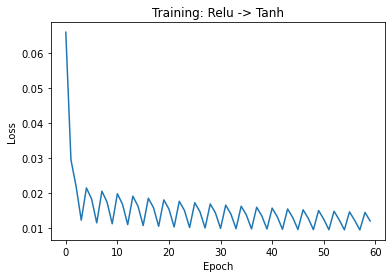

In [4]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from NN import dlnet

dataset = fetch_california_housing() # load the dataset
x, y = dataset.data, dataset.target
y = y.reshape(-1,1)
perm = np.random.RandomState(seed=3).permutation(x.shape[0])[:500]
x = x[perm]
y = y[perm]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1) #split data

x_scale = MinMaxScaler()
x_train = x_scale.fit_transform(x_train) #normalize data
x_test = x_scale.transform(x_test) 

y_scale = MinMaxScaler()
y_train = y_scale.fit_transform(y_train)
y_test = y_scale.transform(y_test)

x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.reshape(1,-1), y_test #condition data

nn = dlnet(x_train,y_train,lr=0.01) # initalize neural net class
nn.batch_gradient_descent(x_train, y_train, iter = 60000) #train


# create figure
fig = plt.plot(np.array(nn.loss).squeeze())
plt.title(f'Training: {nn.neural_net_type}')
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [5]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

y_predicted = nn.predict(x_test) # predict 
y_test = y_test.reshape(1,-1)
print("Mean Squared Error (MSE)", (np.sum((y_predicted-y_test)**2)/y_test.shape[1]))
 


Mean Squared Error (MSE) 0.019014642903062862


## 2: Image Classification based on Convolutional Neural Networks [15pts total = 12pts Bonus for Undergrad + 3pts Bonus for all] <span style="color:green">**[W]**</span>


 Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result as fast as possible is key to doing good research. In this part, you will build a convolutional neural network based on TF/Keras to solve the image classification task for the fashion mnist dataset. If you haven't installed TensorFlow, you can install the package by **pip** command or train your model by uploading HW4 notebook to [Colab](https://colab.research.google.com/) directly. Colab contains all packages you need for this section.  

Hint1: [First contact with Keras](https://keras.io/about/)

Hint2: [How to Install Keras](https://www.pyimagesearch.com/2016/07/18/installing-keras-for-deep-learning/)

Hint3：[CS231n Tutorial (Layers used to build ConvNets) ](https://cs231n.github.io/convolutional-networks/)

### Environment Setup

In [6]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.layers import LeakyReLU
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt

### 2.1.1 Load fashion mnist dataset

We use fashion mnist dataset to train our model. This is a dataset of 60,000 28x28 training images and 10,000 test images, labeled over 10 categories. Each example is $28\times 28$ pixel grayscale image of various clothing items. 

In [7]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

# split data between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# input image dimensions
img_rows, img_cols = 28, 28
number_channels = 1
#set num of classes
num_classes = 10

if tf.keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], number_channels, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], number_channels, img_rows, img_cols)
    input_shape = (number_channels, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, number_channels)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, number_channels)
    input_shape = (img_rows, img_cols, number_channels)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

fashion_classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


### 2.1.2 Load some sample images from fashion mnist

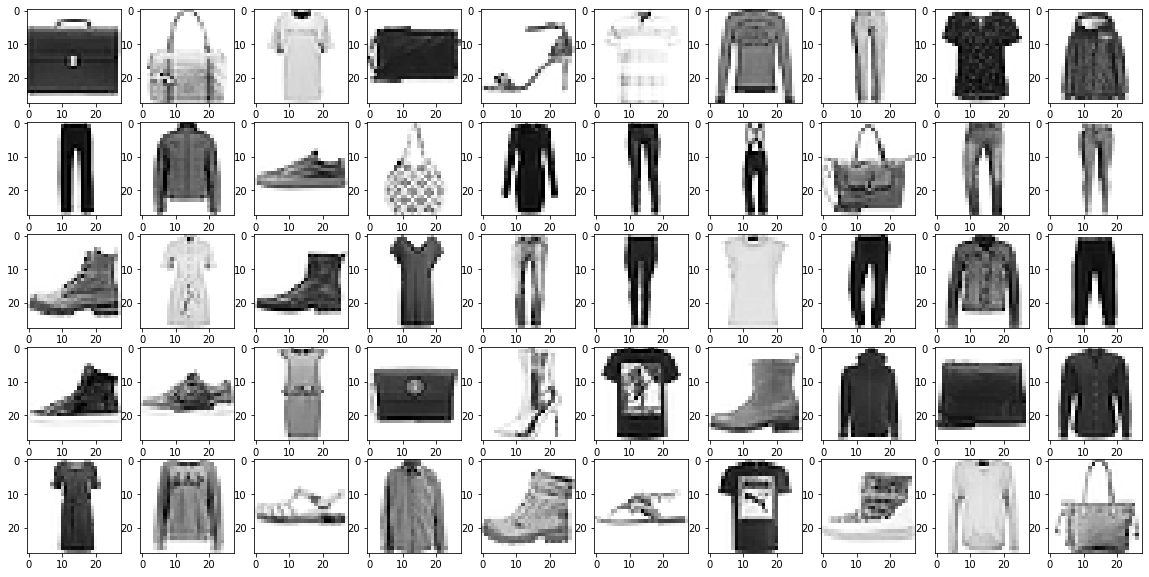

In [8]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

# Show some images from fashion_mnist

fig = plt.figure(figsize=(20, 10))
for i in range(50):
    random_index = np.random.randint(0, len(y_train))
    ax = fig.add_subplot(5, 10, i+1)
    ax.imshow(x_train[random_index, :].squeeze(2), cmap='Greys')
plt.show()

As you can see from above, the fashion mnist dataset contains a selection of fashion objects. The images have been size-normalized and objects remain centered in fixed-size images.

### 2.1.3 Build convolutional neural network model [2pts]

In this part, you need to build a convolutional neural network as described below. All coding should be done in cnn.py. The architecture of the model is:

 **[INPUT - CONV - CONV - MAXPOOL - DROPOUT - CONV - CONV - MAXPOOL - DROPOUT - FC1 - DROPOUT - FC2]**

> INPUT: [$28\times28\times1$] will hold the raw pixel values of the image, in this case, an image of width 28, height 28. This layer should give  8 filters and have appropriate padding to maintain shape.

> CONV: Conv. layer will compute the output of neurons that are connected to local regions in the input, each computing a dot product between their weights and a small region they are connected to the input volume. We decide to set the kernel_size $3\times3$ for the both Conv. layers. For example, the output of the Conv. layer may look like $[28\times28\times32]$ if we use 32 filters. Again, we use padding to maintain shape.

> MAXPOOL: MAXPOOL layer will perform a downsampling operation along the spatial dimensions (width, height). With pool size of $2\times2$, resulting shape takes form $14\times14$.

> DROPOUT: DROPOUT layer with the dropout rate of 0.30, to prevent overfitting.

> CONV: Additonal Conv. layer take outputs from above layers and applies more filters. The Conv. layer may look like $[14\times14\times32]$. We set the kernel_size $3\times3$ and use padding to maintain shape for both Conv. layers.

> CONV: Additonal Conv. layer take outputs from above layers and applies more filters. The Conv. layer may look like $[14\times14\times64]$.

> MAXPOOL: MAXPOOL layer will perform a downsampling operation along the spatial dimensions (width, height).

> DROPOUT: Dropout layer with the dropout rate of 0.30, to prevent overfitting.

> FC1: Dense layer which takes input above layers, and has 256 neurons. Flatten operations may be useful.

> DROPOUT: Dropout layer with the dropout rate of 0.5, to prevent overfitting.

> FC2: Dense layer with 10 neurons, and softmax activation, is the final layer. The dimension of the output space is the number of classes.

**Activation function**:Use LeakyReLU with negative_slope 0.1 unless otherwise indicated to build you model architecture


Note that while this is a suggested model design, you may use other architectures and experiment with different layers for better results.

Use the following keras links to reference crucial layers of the model in keras API:

- Conv2d: https://keras.io/api/layers/convolution_layers/convolution2d/
- Dense: https://keras.io/api/layers/core_layers/dense/
- Flatten: https://keras.io/api/layers/reshaping_layers/flatten/
- MaxPool: https://keras.io/api/layers/pooling_layers/max_pooling2d/
- Dropout: https://keras.io/api/layers/regularization_layers/dropout/

And explore the keras layers API if you would like to experiment with additional layers: https://keras.io/api/layers/



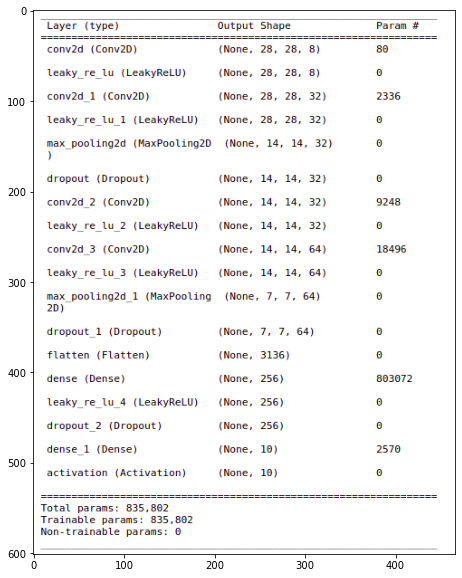

In [9]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

# Show the architecture of the model
achi=plt.imread('./images/Architecture.png')
fig = plt.figure(figsize=(10,10))
plt.imshow(achi)

#### Defining Variables ####

You now need to set training variebles in the __init__() function in cnn.py. Once you have defined variables you may use the cell below to see them.

- Recommended Batch Sizes fall in the range 16-256 (use powers of 2)

- Recommended Epoch Counts fall in the range 3-12

- Recommended Learning Rates fall in the range .0001-.01

In [11]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

# You can adjust parameters to train your model in __init__() in cnn.py

from cnn import CNN

net = CNN()
batch_size, epochs, init_lr = net.get_vars()
print(f'Batch Size\t: {batch_size} \nEpochs\t\t: {epochs} \nLearning Rate\t: {init_lr} \n')


Batch Size	: 256 
Epochs		: 10 
Learning Rate	: 0.001 



#### Defining model ####

You now need to complete the create_net() function in cnn.py to define your model structure. Once you have defined a model structure you may use the cell below to examine your architecture.

Your model is required to have at least 2 convolutional layers and at least 2 dense layers. ensuring that these reqirements are met will earn you 2pts.

In [90]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

# model.summary() gives you details of your architecture.
#You can compare your architecture with the 'Architecture.png'

from cnn import CNN
net = CNN()

s = tf.keras.backend.clear_session()
model=net.create_net()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2336      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9

#### Compiling model ####

Next prepare the model for training by completing compile_model() in cnn.py
Remember we are performing 10-way clasification when selecting a loss function. Loss function can be categorical crossentropy

In [45]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

# Complete compile_model() in cnn.py.
from cnn import CNN
net = CNN()
model = net.compile_net(model)
print(model)

### 2.1.4 Train the network [8pts total (3pts, 3pts, 2pts)]

**Tuning:** Training the network is the next thing to try.  You can set your parameter at the **Defining Variable** section. If your parameters are set properly, you should see the loss of the validation set decreased and the value of accuracy increased. It may take more than 15 minutes to train your model. 

**Expected Result:** You should be able to achieve more than $90\%$ accuracy on the test set to get full 12 points. If you achieve accuracy between $70\%$ to $80\%$, you will only get 3 points. An accuracy between $80\%$ to $90\%$ will earn an additional 3pts.

- $70\%$ to $80\%$ earns 3pts
- $80\%$ to $90\%$ earns 3pts more (6pts total)
- $90\%$+ earns 2pts more (8pts total)

#### Train your own CNN model

In [47]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

# Train the model

from cnn import CNN

net = CNN()
batch_size, epochs, init_lr = net.get_vars()

def lr_scheduler(epoch):
    new_lr = init_lr * 0.9 ** epoch
    print("Learning rate:", new_lr)
    return new_lr

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler)],
    shuffle=True,
    verbose=1,
    initial_epoch=0, 
    validation_data=(x_test, y_test)
)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Learning rate: 0.001
Epoch 1/10
60000/60000 [==============================] - 283s 5ms/sample - loss: 0.4281 - accuracy: 0.8437 - val_loss: 0.3419 - val_accuracy: 0.8716
Learning rate: 0.0009000000000000001
Epoch 2/10
60000/60000 [==============================] - 292s 5ms/sample - loss: 0.3612 - accuracy: 0.8685 - val_loss: 0.2998 - val_accuracy: 0.8880
Learning rate: 0.0008100000000000001
Epoch 3/10
60000/60000 [==============================] - 278s 5ms/sample - loss: 0.3250 - accuracy: 0.8809 - val_loss: 0.2729 - val_accuracy: 0.9000
Learning rate: 0.0007290000000000002
Epoch 4/10
60000/60000 [==============================] - 280s 5ms/sample - loss: 0.2974 - accuracy: 0.8912 - val_loss: 0.2703 - val_accuracy: 0.9019
Learning rate: 0.0006561000000000001
Epoch 5/10
60000/60000 [==============================] - 296s 5ms/sample - loss: 0.2785 - accuracy: 0.8992 - val_loss: 0.2485 - val_accuracy: 0.9125
Learning rate: 0.00059049
Epoch

### 2.1.5 Examine accuracy and loss [2pts]

You should expect to see gradually decreasing loss and gradually increasing accuracy. Examine loss and accuracy by running the cell below, no editing is necessary. Having appropriate looking loss and accuracy plots will earn you the last 2pts for your convolutional net.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


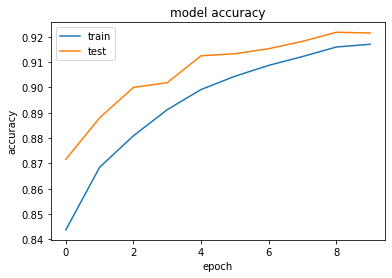

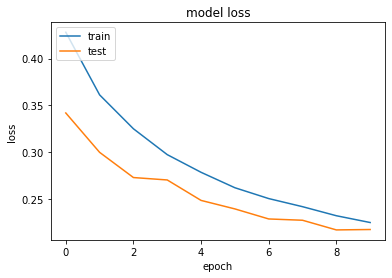

In [48]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

# list all data in history
print(history.history.keys())

# summarize history for accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


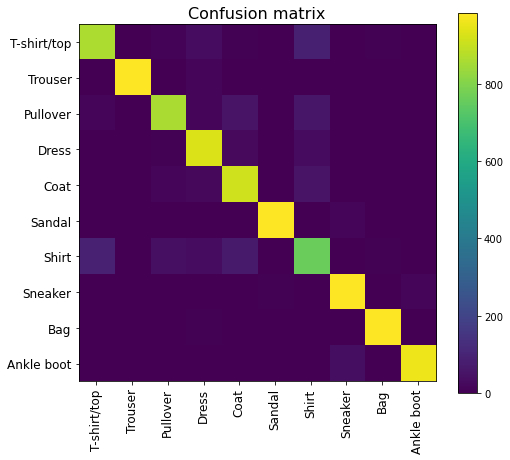

In [49]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

# make predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_prob = np.max(y_pred, axis=1)
y_gt_classes = np.argmax(y_test, axis=1)

from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(8, 7))
plt.imshow(confusion_matrix(y_gt_classes, y_pred_classes))
plt.title('Confusion matrix', fontsize=16)
plt.xticks(np.arange(10), fashion_classes, rotation=90, fontsize=12)
plt.yticks(np.arange(10), fashion_classes, fontsize=12)
plt.colorbar()
plt.show()

### 2.2 Exploring Deep CNN Architectures [3pts] (Bonus for all)

The network you have produced is rather simple relative to many of those used in industry and research. Researchers have worked to make CNN models deeper and deeper over the past years in an effort to gain higher accuracy in predictions. While your model is only a handful of layers deep, some state of the art deep architectures may include up to 150 layers. However, this process has not been without challenges. 

One such problem is the problem of the vanishing gradient. The weights of a neural network are updated using the backpropagation algorithm. The backpropagation algorithm makes a small change to each weight in such a way that the loss of the model decreases. Using the chain rule, we can find this gradient for each weight. But, as this gradient keeps flowing backwards to the initial layers, this value keeps getting multiplied by each local gradient. Hence, the gradient becomes smaller and smaller, making the updates to the initial layers very small, increasing the training time considerably.

Many tactics have been used in an effort to solve this problem. One architecture, named ResNet, solves the vanishing gradient problem in a unique way. ResNet was developed at Microsoft Research to find better ways to train deep networks. Take a moment to explore how ResNet tackles the vanishing gradient problem by reading the original research paper here: https://arxiv.org/pdf/1512.03385.pdf (also included as PDF in papers directory). 


**Question:** In your own words, explain how ResNet addresses the vanishing gradient problem in 1-2 sentences below: (Please type answers directly in the cell below.)

In residual networks, we insert shortcut connections to a plain network that allows the gradient to flow uninterrupted and hence solves the vanishing gradient problem.

## 3: Random Forests [50pts] <span style="color:blue">**[P]**</span> <span style="color:green">**[W]**</span>

**NOTE**: Please use sklearn's DecisionTreeClassifier in your Random Forest implementation.
[You can find more details about this classifier here.](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier_)

### 3.1 Random Forest Implementation (35 pts) <span style="color:blue">**[P]**</span>

The decision boundaries drawn by decision trees are very sharp, and fitting a decision tree of unbounded depth to a list of examples almost inevitably leads to **overfitting**. In an attempt to decrease the variance of a decision tree, we're going to use a technique called 'Bootstrap Aggregating' (often abbreviated 'bagging'). This stems from the idea that a collection of weak learners can learn decision boundaries as well as a strong learner. This is commonly called a Random Forest.

We can build a Random Forest as a collection of decision trees, as follows:

1. For every tree in the random forest, we're going to 

    a) Subsample the examples with replacement. Note that in this question, the size of the subsample data is equal to the original dataset. 
    
    b) From the subsamples in part a, choose attributes at random without replacement to learn on in accordance with a provided attribute subsampling rate. Based on what it was mentioned in the class, we randomly pick features in each split. We use a more general approach here to make the programming part easier. Let's randomly pick some features (70% percent of features) and grow the tree based on the pre-determined randomly selected features. Therefore, there is no need to find random features in each split.
    
    c) Fit a decision tree to the subsample of data we've chosen to a certain depth.
    
Classification for a random forest is then done by taking a majority vote of the classifications yielded by each tree in the forest after it classifies an example.

In RandomForest Class, 
1. X is assumed to be a matrix with num_training rows and num_features columns where num_training is the
number of total records and num_features is the number of features of each record. 

2. y is assumed to be a vector of labels of length num_training.

**NOTE:** Lookout for TODOs for the parts that needs to be implemented. If you receive any ``SettingWithCopyWarning`` warnings from the Pandas library, you can safely ignore them.

### 3.2 Hyperparameter Tuning with a Random Forest (5pts) <span style="color:blue">**[P]**</span>

In machine learning, hyperparameters are parameters that are set before the learning process begins. The max_depth, num_estimators, or max_features variables from 3.1 are examples of different hyperparameters for a random forest model. In this section, you will tune your random forest model on a heart disease to achieve a high accuracy on  determining the likelihood of patient having narrowing arteries.

Let's first review the dataset in a bit more detail.

#### Dataset Objective

Imagine that we are doctors working on a cure for heart disease by using machine learning to categorize patients. We know that narrowing arteries are an early indicator of disease. We are tasked with the responsibility of coming up with a method for determining the likelihood of patient having narrowing arteries. We will then use this information to decide which patients to run further tests on for treatment.

After much deliberation amongst the team, you come to a conclusion that we can use past patient data to predict the future occurence of disease. 

We will use our random forest algorithm from Q3.1 to predict if a patient may have indicators of heart disease.

You can find more information on the dataset [here](https://archive.ics.uci.edu/ml/datasets/heart+disease).

#### Loading the dataset


The dataset that the company has collected has the following features:

Only 13 features used out of a potential 76 to train. We also use the "num" feature as our label we are trying to predict.
 
Inputs:

1. (age)       
2. (type)       
3. (cp) chest pain type
4. (trestbps) resting blood pressure (in mm Hg on admission to the hospital)
5. (chol) serum cholestoral in mg/dl
6. (fbs) (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. (restecg) resting electrocardiographic results:
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. (thalach) maximum heart rate achieved
9. (exang) exercise induced angina (1 = yes; 0 = no)
10. (oldpeak) ST depression induced by exercise relative to rest
11. (slope) the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping
12. (ca) number of major vessels (0-3) colored by flourosopy      
13. (thal) 3 = normal; 6 = fixed defect; 7 = reversable defect

Output:

14. (num) target value:
    * 0 means <50% chance of narrowing arteries 
    * 1 means greater than 50% chance of narrowing arteries
    
Your random forest model will try to predict this variable.

In [61]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################
from sklearn import preprocessing
import pandas as pd
preprocessor = preprocessing.LabelEncoder()

data_train = pd.read_csv("./data/heart_disease_cleaveland_train.csv")
data_test = pd.read_csv("./data/heart_disease_cleaveland_test.csv")

X_train = data_train.drop(columns = 'num')
y_train = data_train['num']
y_train = y_train.to_numpy()
y_train[y_train > 1] = 1
X_test = data_test.drop(columns = 'num')
X_test = np.array(X_test)
y_test = data_test['num']
y_test = y_test.to_numpy()
y_test[y_test > 1] = 1
X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

In [62]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################
assert X_train.shape == (200, 13)
assert y_train.shape == (200,)
assert X_test.shape == (98, 13)
assert y_test.shape == (98,)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((200, 13), (200,), (98, 13), (98,))

In the following codeblock, train your random forest model with different values for max_depth, n_estimators, or max_features and evaluate each model on the held-out test set. Try to choose a combination of hyperparameters that maximizes your prediction accuracy on the test set (aim for 75%+). 

Once you are satisfied with your chosen parameters, change the values for ```max_depth```, ```n_estimators```, and ```max_features``` in the ```select_hyperparameters()``` function of your RandomForest class in ```random_forest.py``` to your chosen values, and then submit this file to Gradescope. You must achieve at least a **75% accuracy** against the test set in Gradescope to receive full credit for this section.

In [63]:
"""
TODO: 
n_estimators defines how many decision trees are fitted for the random forest.
max_depth defines a stop condition when the tree reaches to a certain depth.
max_features controls the percentage of features that are used to fit each decision tree.

Tune these three parameters to achieve a better accuracy. While you can use the provided test set to 
evaluate your implementation, you will need to obtain 75% on the test set to receive full credit 
for this section.
"""
from random_forest import RandomForest
import sklearn.ensemble

################# DO NOT CHANGE THIS RANDOM SEED ####################
student_random_seed = 4641 + 7641
#####################################################################

################# CHANGE THESE VALUES ###############################
n_estimators = 7 #Hint: Consider values between 5-12.
max_depth = 4 # Hint: Consider values betweeen 3-12.
max_features = 0.6 # Hint: Consider values betweeen 0.6-1.0.
#####################################################################

random_forest = RandomForest(n_estimators, max_depth, max_features, random_seed=student_random_seed)
random_forest.fit(X_train, y_train)
    
accuracy=random_forest.OOB_score(X_test, y_test)
    
print("accuracy: %.4f" % accuracy)

accuracy: 0.8132


**DON'T FORGET**: Once you are satisfied with your chosen parameters, change the values for ```max_depth```, ```n_estimators```, and ```max_features``` in the ```select_hyperparameters()``` function of your RandomForest class in ```random_forest.py``` to your chosen values, and then submit this file to Gradescope. You must achieve at least a **75% accuracy** against the test set in Gradescope to receive full credit for this section.

### 3.3 Plotting Feature Importance (5pts) <span style="color:green">**[W]**</span>

While building tree-based models, it's common to quantify how well splitting on a particular feature in a decision tree helps with predicting the target label in a dataset. Machine learning practicioners typically use "Gini importance", or the (normalized) total reduction in entropy brought by that feature to evaluate how important that feature is for predicting the target variable. 

Gini importance is typically calculated as the reduction in entropy from reaching a split in a decision tree weighted by the probability of reaching that split in the decision tree. Sklearn internally computes the probability for reaching a split by finding the total number of samples that reaches it during the training phase divided by the total number of samples in the dataset. This weighted value is our feature importance.

Let's think about what this metric means with an example. A high probabiity of reaching a split on "Age" in a decision tree trained on our patient dataset (many samples will reach this split for a decision) and a large reduction in entropy from splitting on "Age" will result in a high feature importance value for "Age". This could mean "Age" is a very important feature for predicting a patients probability of disease. On the other hand, a low probability of reaching a split on "Cholesterol (chol)" in a decision tree (few samples will reach this split for a decision) and a low reduction in entropy from splitting on "Cholesterol (chol)" will result in a low feature importance value. This could mean "Cholesterol (chol)" is not a very informative feature for predicting a patients probability of disease in our decision tree. **Thus, the higher the feature importance value, the more important the feature is to predicting the target label.**

Fortunately for us, fitting a sklearn.DecisionTreeClassifier to a dataset auomatically computes the Gini importance for every feature in the decision tree and stores these values in a **feature_importances_** variable. [Review the docs for more details on how to access this variable](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)

In the function below, display a bar plot that shows the feature importance values for at least one decision tree in your tuned random forest from Q3.2, and briefly comment on whether any features have noticeably higher / or lower importance weights than others. **Please also sort the bars in descending order.** You can also remove any features that have a feature importance of zero.

[Note that there isn't a "correct" answer here. We simply want you to investigate how different features in your random forest contribute to predicting the target variable].



// I have noticed that restecg have more importance weight that age or fbs.


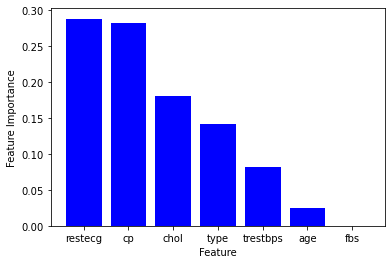

In [64]:
# TODO: Complete plot_feature_importance() in random_forest.py

random_forest.plot_feature_importance(data_train)

### 3.4 Improvement (5pts) <span style="color:green">**[W]**</span>

For this question, we only ask that the Random Forest model have an accuracy of at least 75%. In the real world, we would not be satisified with this accuracy and would most likely not immediately deploy this model to identify narrowing arteries. 

Please answer the following two questions:
1. What are some potential causes for why a Random Forest decision tree model may not produce high accuracies?

If your dataset had a lot of features and since you are sampling  random feat8res, you can end up with models that don't contain any relevant features and hence you would obtain low accuracies. 

2. What are some ways to improve on these potential causes?

You can remove irrelevant features from your dataset or acquire more training data to ensure you minimize the chance of picking irrelevant features.




## 4: SVM (30 Pts) Bonus of all <span style="color:green">**[W]**</span> <span style="color:blue">**[P]**</span>


### 4.1 Fitting an SVM classifier by hand (20 Pts) <span style="color:green">**[W]**</span>

Consider a dataset with the following points in 2-dimensional space:

| $$x_1$$ | $$x_2$$ | $$y$$ |
| --- | --- | --- |
| 0 | 0 | -1 |
| 0 | 2 | -1 |
| 2 | 0 | -1 |
| 2 | 2 | 1 |
| 4 | 0 | 1 |
| 4 | 4 | 1 |

Here, $x_1$ and $x_2$ are features and $y$ is the label.

The max margin classifier has the formulation,

$$\min{||\mathbf{\theta}||^2} $$

$$s.t.\ y_i(\mathbf{x_i} \mathbf{\theta} + b) ≥ 1 \ \ \ \ \forall \ i$$

**Hint:** $\mathbf{x_i}$ are the suppport vectors. Margin is equal to $\frac{1}{||\mathbf{\theta}||}$ and full margin is equal to $\frac{2}{||\mathbf{\theta}||}$. You might find it useful to plot the points in a 2D plane. When calculating the $\theta$ you don't need to consider the bias term.

(1) Are the points linearly separable? Does adding the point $\mathbf{x} = (4, 2)$, $y = -1$ change the separability? (2 pts) \
\
Ans: Yes the points are linearly separable. Yes, if we add the point $\mathbf{x} = (4, 2)$, $y = -1$, we make the points become non-linearly separable because that point is now in the same area as all the other points that have $y=1$ so we can't linearly separate.

(2) According to the max-margin formulation, find the separating hyperplane. Do not consider the new point from part 1 in your calculations for this current question or subsequent parts. (You should give some kind of explanation or calculation on how you found the hyperplane.) (4 pts) \

Ans:
<img src="images/i.png" width="300" height = "300">

For this question, I just drew the plots out in 2D with $x_1$ and $x_2$. Since we needed to find a hyperplane that maximizes distances from closest points from both data point sets where $y = 1$ (the yellow points) and where $y = -1$ (the pink points) equally. Hence on the grid the only way would be to find the middle ground and that forms the equation $x_1 + x_2 = 3$, hence the hyperplane would be $x_1 + x_2 -3 = 0$


(3) Find a vector parallel to the optimal vector $\mathbf{\theta}$. (4 pts) 

Finding a vector parallel to the optimal vector $\mathbf{\theta}$ is just finding a vector perpendicular to the plane in 4.2. Hence, we can just take the coefficients of the hyperplane and get a vector (1, 1) and that is going to be parallel to the optimal vector $\mathbf{\theta}$.


(4) Calculate the value of the margin (single-sided) achieved by this $\mathbf{\theta}$? (4 pts) 

Not sure if it means $\frac{1}{||\mathbf{\theta}||}$ or $\frac{2}{||\mathbf{\theta}||}$ but here are both:


If you reflect (1, 1) across the hyperplane, you get the point (2, 2) (it can be see in the graph). Hence ${||\mathbf{\theta}||}$ is $\sqrt{{(2 -1)^2} + {(2 -1)^2}} = \sqrt{2}$.

so full margin is $\frac{2}{\sqrt{2}}$ and half margin is $\frac{1}{\sqrt{2}}$
   
(5) Solve for $\mathbf{\theta}$, given that the margin is equal to $1/||\mathbf{\theta}||$. (4 pts) 

${||\mathbf{\theta}||}$ = $\sqrt{\theta_1^2 + \theta_2^2}$
we know from our vector (1, 1) that $\theta_1^2$ = $\theta_2^2$, hence:

${||\mathbf{\theta}||}$ = $\sqrt{\theta_1^2 + \theta_2^2} = \sqrt{2}$ 

$2\theta_1^2 = 2$

$\theta = (1, 1)$

(6) If we remove one of the points from the original data the SVM solution might change. Find all such points which change the solution. (2 pts) 

(0, 2) , (2, 0), (2, 2), (4, 0)

All the points that have the arrows drawn from them so they are equal distance apart

### 4.2 Feature Mapping (10 Pts) <span style="color:blue">**[P]**</span>

Let's look at a dataset where the datapoint can't be classified with a good accuracy using a linear classifier. Run the below cell to generate the dataset.

We will also see what happens when we try to fit a linear classifier to the dataset.

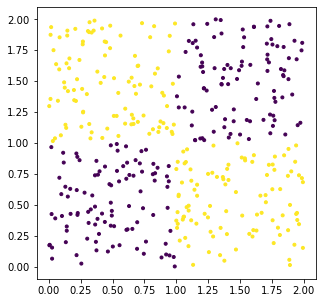

In [91]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################
# Generate dataset

random_state = 1

X_1 = np.random.uniform(size=(100, 2))
y_1 = np.zeros((100,)) - 1

X_2 = np.random.uniform(size=(100, 2))
X_2[:, 0] = X_2[:, 0] + 1.0
y_2 = np.ones((100,))

X_3 = np.random.uniform(size=(100, 2))
X_3[:, 1] = X_3[:, 1] + 1.0
y_3 = np.ones((100,))

X_4 = np.random.uniform(size=(100, 2))
X_4[:, 0] = X_4[:, 0] + 1.0
X_4[:, 1] = X_4[:, 1] + 1.0
y_4 = np.zeros((100,)) - 1

X = np.concatenate([X_1, X_2, X_3, X_4], axis=0)
y = np.concatenate([y_1, y_2, y_3, y_4], axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=random_state)

f, ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c = y, marker = '.') 
plt.show() 

In [92]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

def visualize_decision_boundary(X, y, feature_new=None, h=0.02):
    '''
    You don't have to modify this function
    
    Function to vizualize decision boundary
    
    feature_new is a function to get X with additional features
    '''
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx_1, xx_2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))

    if X.shape[1] == 2:
        Z = svm_cls.predict(np.c_[xx_1.ravel(), xx_2.ravel()])
    else:
        X_conc = np.c_[xx_1.ravel(), xx_2.ravel()]
        X_new = feature_new(X_conc)
        Z = svm_cls.predict(X_new)
    Z = Z.reshape(xx_1.shape)
    
    f, ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
    plt.contourf(xx_1, xx_2, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.xlim(xx_1.min(), xx_1.max())
    plt.ylim(xx_2.min(), xx_2.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

Accuracy on test dataset: 0.375


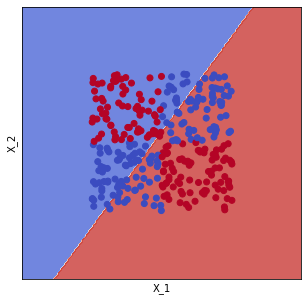

In [93]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################
# Try to fit a linear classifier to the dataset

svm_cls = svm.LinearSVC()
svm_cls.fit(X_train, y_train)
y_test_predicted = svm_cls.predict(X_test)

print("Accuracy on test dataset: {}".format(accuracy_score(y_test, 
                                                           y_test_predicted)))

visualize_decision_boundary(X_train, y_train)

We can see that we need a non-linear boundary to be able to successfully classify data in this dataset. By mapping the current feature x to a higher space with more features, linear SVM could be performed on the features in the higher space to learn a non-linear decision boundary. In the function below add additional features which can help classify in the above dataset. After creating the additional features use code in the further cells to see how well the features perform on the test set. 

**Note:** You should get a test accuracy above 90%

**Hint:** Think of the shape of the decision boundary that would best separate the above points. What additional features could help map the linear boundary to the non-linear one? Look at [this](https://xavierbourretsicotte.github.io/Kernel_feature_map.html) for a detailed analysis of doing the same for points separable with a circular boundary

In [103]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################
from feature import create_nl_feature

X_new = create_nl_feature(X)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 
                                                    test_size=0.20, 
                                                    random_state=random_state)

Accuracy on test dataset: 0.95


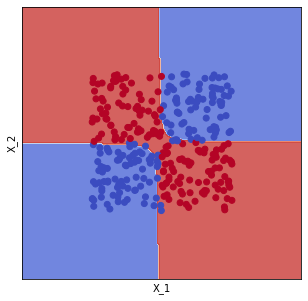

In [104]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################
# Fit to the new features and vizualize the decision boundary
# You should get more than 90% accuracy on test set

svm_cls = svm.LinearSVC()
svm_cls.fit(X_train, y_train)
y_test_predicted = svm_cls.predict(X_test)

print("Accuracy on test dataset: {}".format(accuracy_score(y_test, y_test_predicted)))

visualize_decision_boundary(X_train, y_train, create_nl_feature)